<a href="https://colab.research.google.com/github/MonaRansing/stock-market-data-analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Load dataset
stock_df = pd.read_excel("/content/drive/MyDrive/Almabetter/Data Science/dataset/Stock market dataset.xlsx")
stock_df.head()

,Symbol,ISIN,Quantity,Buy Value,Sell Value,Realized P&L,Realized P&L Pct.,Previous Closing Price,Open Quantity,Open Quantity Type,Open Value,Unrealized P&L,Unrealized P&L Pct.
0,ADANIENT,INE423A01024,29,103503.55,110063.0,6559.45,6.3374,0.0,0,NaN,0.0,0.0,0.0
1,ADANIPOWER,INE814H01011,40,16384.00,15300.0,-1084.00,-6.6162,0.0,0,NaN,0.0,0.0,0.0
2,AWL,INE699H01024,6,4176.00,4530.0,354.00,8.4770,0.0,0,NaN,0.0,0.0,0.0
3,BANDHANBNK,INE545U01014,90,21872.50,20972.5,-900.00,-4.1148,0.0,0,NaN,0.0,0.0,0.0
4,BANKBARODA,INE028A01039,100,23300.00,22651.0,-649.00,-2.7854,0.0,0,NaN,0.0,0.0,0.0


In [14]:
stock_df.shape

(66, 13)

In [15]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  66 non-null     object 
 1   ISIN                    66 non-null     object 
 2   Quantity                66 non-null     int64  
 3   Buy Value               66 non-null     float64
 4   Sell Value              66 non-null     float64
 5   Realized P&L            66 non-null     float64
 6   Realized P&L Pct.       66 non-null     float64
 7   Previous Closing Price  66 non-null     float64
 8   Open Quantity           66 non-null     int64  
 9   Open Quantity Type      0 non-null      float64
 10  Open Value              66 non-null     float64
 11  Unrealized P&L          66 non-null     float64
 12  Unrealized P&L Pct.     66 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.8+ KB


In [16]:
stock_df.columns

Index(['Symbol', 'ISIN', 'Quantity', 'Buy Value', 'Sell Value', 'Realized P&L',
       'Realized P&L Pct.', 'Previous Closing Price', 'Open Quantity',
       'Open Quantity Type', 'Open Value', 'Unrealized P&L',
       'Unrealized P&L Pct.'],
      dtype='object')

In [17]:
stock_df.describe()

,Quantity,Buy Value,Sell Value,Realized P&L,Realized P&L Pct.,Previous Closing Price,Open Quantity,Open Quantity Type,Open Value,Unrealized P&L,Unrealized P&L Pct.
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,0.0,66.000000,66.000000,66.000000
mean,158.181818,41934.200000,42532.844697,598.644697,1.037382,12.267424,0.378788,NaN,331.351515,-24.665909,-0.112788
std,236.548249,45887.444497,47538.825488,3303.731092,7.265822,99.661026,3.077287,NaN,2691.912435,200.386793,0.916293
min,1.000000,7.000000,6.950000,-2739.250000,-9.583500,0.000000,0.000000,NaN,0.000000,-1627.950000,-7.444000
25%,26.000000,13914.750000,14043.700000,-1062.375000,-3.631525,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
50%,67.500000,23492.625000,22445.500000,-82.525000,-0.260650,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
75%,161.250000,57857.812500,56845.100000,895.262500,4.893800,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
max,1135.000000,255345.250000,271764.100000,16418.850000,33.104100,809.650000,25.000000,NaN,21869.200000,0.000000,0.000000


In [18]:
# find out duplicate values
stock_df.duplicated().sum()

0

In [22]:
# find out missing or null values
stock_df.isnull().sum().sort_values(ascending=False)[:2]

,0
Open Quantity Type,66
Symbol,0


In [28]:
# unique values for each variable
stock_df.nunique()

,0
Symbol,66
ISIN,66
Quantity,44
Buy Value,66
Sell Value,66
Realized P&L,66
Realized P&L Pct.,66
Previous Closing Price,2
Open Quantity,2
Open Quantity Type,0


In [31]:
# replace null values from column name open quantity type
stock_df['Open Quantity Type'].fillna('0', inplace=True)
stock_df.head()

,Symbol,ISIN,Quantity,Buy Value,Sell Value,Realized P&L,Realized P&L Pct.,Previous Closing Price,Open Quantity,Open Quantity Type,Open Value,Unrealized P&L,Unrealized P&L Pct.
0,ADANIENT,INE423A01024,29,103503.55,110063.0,6559.45,6.3374,0.0,0,0,0.0,0.0,0.0
1,ADANIPOWER,INE814H01011,40,16384.00,15300.0,-1084.00,-6.6162,0.0,0,0,0.0,0.0,0.0
2,AWL,INE699H01024,6,4176.00,4530.0,354.00,8.4770,0.0,0,0,0.0,0.0,0.0
3,BANDHANBNK,INE545U01014,90,21872.50,20972.5,-900.00,-4.1148,0.0,0,0,0.0,0.0,0.0
4,BANKBARODA,INE028A01039,100,23300.00,22651.0,-649.00,-2.7854,0.0,0,0,0.0,0.0,0.0


In [30]:
# check missing or null values after replacement
stock_df.isnull().sum()

,0
Symbol,0
ISIN,0
Quantity,0
Buy Value,0
Sell Value,0
Realized P&L,0
Realized P&L Pct.,0
Previous Closing Price,0
Open Quantity,0
Open Quantity Type,0


Q.1 Win rate

In [65]:
# find out no of win rate of trader
# total trade
total_trade = len(stock_df)
# first find winning trade
winning_trade = len(stock_df[stock_df['Realized P&L']>0])

#calculate win rate
win_rate = ((winning_trade/total_trade)*100)/100
win_rate

0.48484848484848486

Expentancy

In [64]:
# Find out loss rate
loss_rate = (100-win_rate)/100
loss_rate

0.5151515151515151

In [52]:
avg_profit = stock_df[stock_df['Realized P&L']>0]['Realized P&L'].mean()
avg_profit

2455.2046875

In [53]:
avg_loss = abs(stock_df[stock_df['Realized P&L']<0]['Realized P&L'].mean())
avg_loss

1148.7058823529412

In [66]:
# find out average profit
avg_profit = stock_df[stock_df['Realized P&L']>0]['Realized P&L'].mean()

# find out average loss
avg_loss = abs(stock_df[stock_df['Realized P&L']<0]['Realized P&L'].mean())

# calculate expentancy
expentancy = (avg_profit*win_rate)-(avg_loss*loss_rate)
expentancy

598.644696969697

Win Streak

In [50]:
# find out top win
top_win = stock_df[stock_df['Realized P&L']>0]['Realized P&L'].max()
top_win

16418.85

In [51]:
# find out top loss
top_loss = stock_df[stock_df['Realized P&L']<0]['Realized P&L'].min()
top_loss

-2739.25

Total profit per stock symbol

In [69]:
# find out total profit per stock symbol
total_profit_per_symbol = stock_df.groupby('Symbol')['Realized P&L'].sum()
symbol_with_profit = total_profit_per_symbol[total_profit_per_symbol>0]
symbol_with_profit

,Realized P&L
Symbol,
ADANIENT,6559.45
AWL,354.00
BEL,471.25
BSOFT,461.10
CESC,1075.00
COALINDIA,1403.75
ENGINERSIN,1006.20
EXIDEIND,1098.00
GAIL,665.00


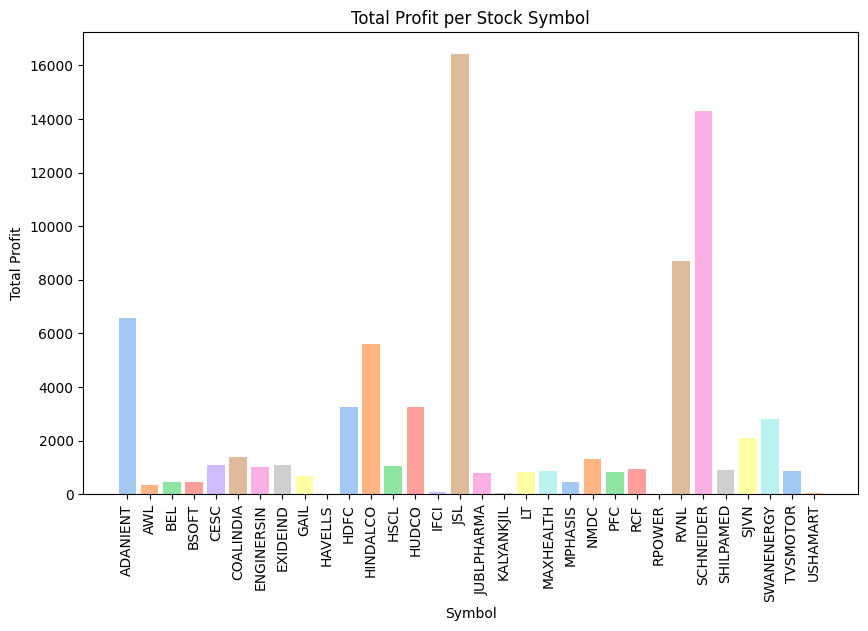

In [72]:
# visualize symbol with profit
# colour palette
colors = sns.color_palette('pastel')
# create bar plot
plt.figure(figsize=(10,6))
plt.bar(symbol_with_profit.index, symbol_with_profit.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Total Profit')
plt.title('Total Profit per Stock Symbol')
plt.xticks(rotation=90)
plt.show()

In [73]:
# Symbol with loss
symbol_with_loss = total_profit_per_symbol[total_profit_per_symbol<0]
symbol_with_loss

,Realized P&L
Symbol,
ADANIPOWER,-1084.00
BANDHANBNK,-900.00
BANKBARODA,-649.00
BHEL,-473.25
BSE,-2443.50
EIHOTEL,-979.50
GRANULES,-607.50
HAL,-741.30
HBLPOWER,-1220.70


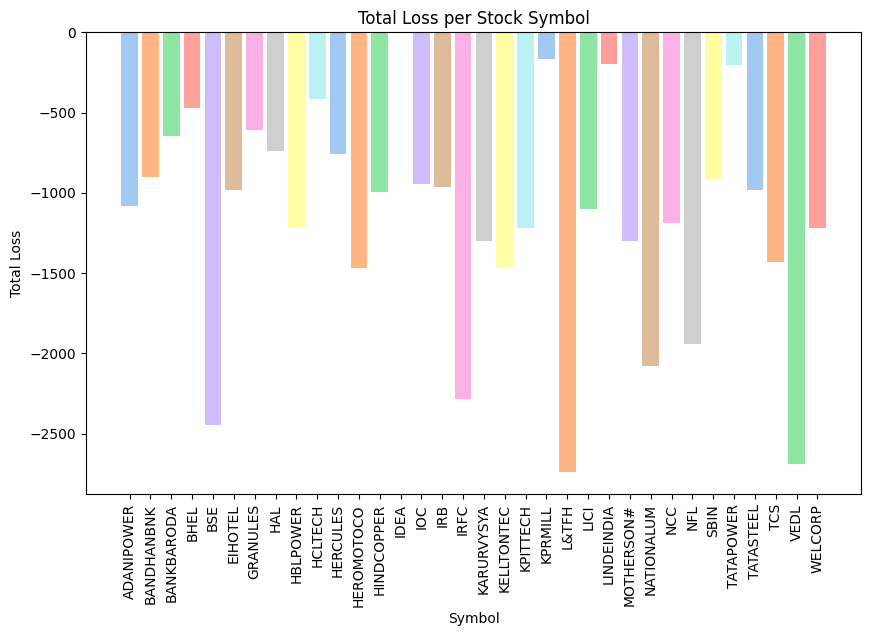

In [74]:
# visualize using bar code
# define colour
colors = sns.color_palette('pastel')
# create bar plot
plt.figure(figsize=(10,6))
plt.bar(symbol_with_loss.index, symbol_with_loss.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Total Loss')
plt.title('Total Loss per Stock Symbol')
plt.xticks(rotation=90)
plt.show()

Percentage return for each stock

In [76]:
# find out percentage return for each stock
# step 1 : Calculate total buy value for each symbol
total_buy_value = stock_df.groupby('Symbol')['Buy Value'].sum()

# step 2 : Calculate total profit for each symbol
total_profit = stock_df.groupby('Symbol')['Realized P&L'].sum()

# step 3 : Calculate percentage return for each symbol
percentage_return = (total_profit/total_buy_value)*100
percentage_return

,0
Symbol,
ADANIENT,6.337415
ADANIPOWER,-6.616211
AWL,8.477011
BANDHANBNK,-4.114756
BANKBARODA,-2.785408
...,...
TCS,-4.815911
TVSMOTOR,1.705851
USHAMART,0.271739


In [80]:
positive_percent_return = percentage_return[percentage_return>0]
positive_percent_return

,0
Symbol,
ADANIENT,6.337415
AWL,8.477011
BEL,6.654898
BSOFT,0.470935
CESC,12.602579
COALINDIA,2.939868
ENGINERSIN,2.746389
EXIDEIND,1.768458
GAIL,2.135174


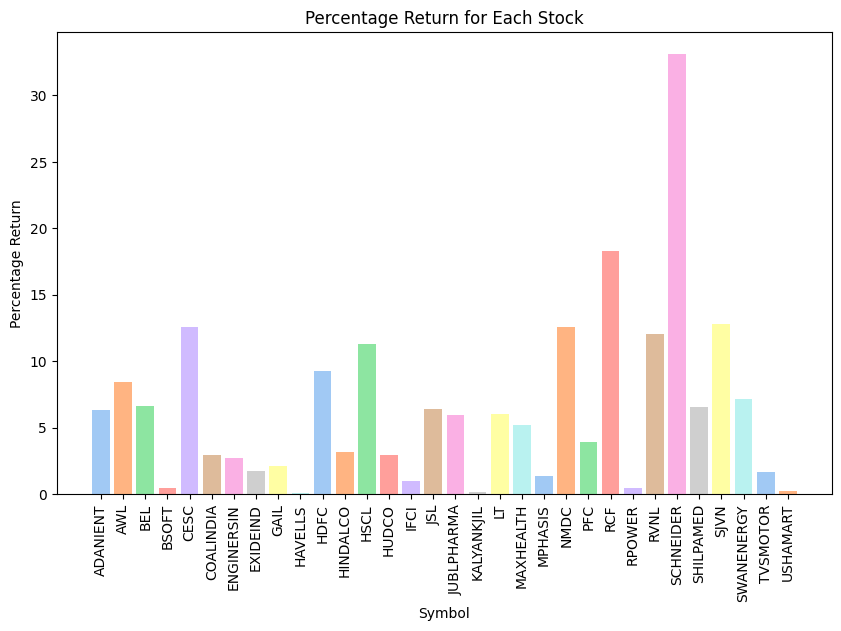

In [81]:
# visualize using barplot
# define colors
colors = sns.color_palette('pastel')
# create bar plot
plt.figure(figsize=(10,6))
plt.bar(positive_percent_return.index, positive_percent_return.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Percentage Return')
plt.title('Percentage Return for Each Stock')
plt.xticks(rotation=90)
plt.show()

In [82]:
negative_percent_return = percentage_return[percentage_return<0]
negative_percent_return

,0
Symbol,
ADANIPOWER,-6.616211
BANDHANBNK,-4.114756
BANKBARODA,-2.785408
BHEL,-0.682295
BSE,-3.144007
EIHOTEL,-6.581334
GRANULES,-3.266129
HAL,-2.358747
HBLPOWER,-6.110527


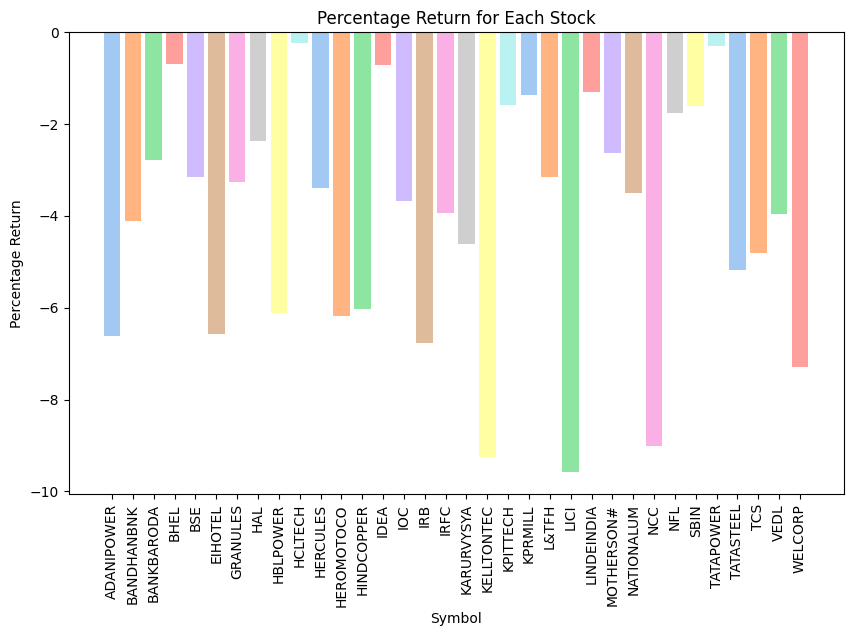

In [83]:
# visualize using bar plot
plt.figure(figsize=(10,6))
plt.bar(negative_percent_return.index, negative_percent_return.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Percentage Return')
plt.title('Percentage Return for Each Stock')
plt.xticks(rotation=90)
plt.show()

Compare realized profit and loss with unrealized profit and loss

In [90]:
# comparison
# Calculate the comparison columns
stock_df['Total_P&L'] = stock_df['Realized P&L'] + stock_df['Unrealized P&L']  # Total P&L
stock_df['P&L_Difference'] = stock_df['Unrealized P&L'] - stock_df['Realized P&L']  # Difference
stock_df['P&L_Ratio'] = stock_df['Unrealized P&L'] / stock_df['Realized P&L']  # Ratio of Unrealized to Realized

# Display the updated DataFrame with new comparison columns
print(stock_df[['Realized P&L', 'Unrealized P&L', 'Total_P&L', 'P&L_Difference', 'P&L_Ratio']].head())


   Realized P&L  Unrealized P&L  Total_P&L  P&L_Difference  P&L_Ratio
0       6559.45             0.0    6559.45        -6559.45        0.0
1      -1084.00             0.0   -1084.00         1084.00       -0.0
2        354.00             0.0     354.00         -354.00        0.0
3       -900.00             0.0    -900.00          900.00       -0.0
4       -649.00             0.0    -649.00          649.00       -0.0


# which stock has largest open quantities

In [93]:
# find out stock with largest open quantities
stock_largest_open_quantity = stock_df.groupby('Symbol')['Open Quantity'].sum().sort_values(ascending=False)[:10]
stock_largest_open_quantity

,Open Quantity
Symbol,
SCHNEIDER,25
ADANIENT,0
LT,0
NCC,0
NATIONALUM,0
MPHASIS,0
MOTHERSON#,0
MAXHEALTH,0
LINDEINDIA,0


Avearge buy value and sell value for diffrent stocks

In [96]:
# average buy value for top 20 stocks
average_buy_value = stock_df.groupby('Symbol')['Buy Value'].mean()[:20]
average_buy_value

,Buy Value
Symbol,
ADANIENT,103503.55
ADANIPOWER,16384.00
AWL,4176.00
BANDHANBNK,21872.50
BANKBARODA,23300.00
BEL,7081.25
BHEL,69361.50
BSE,77719.30
BSOFT,97911.65


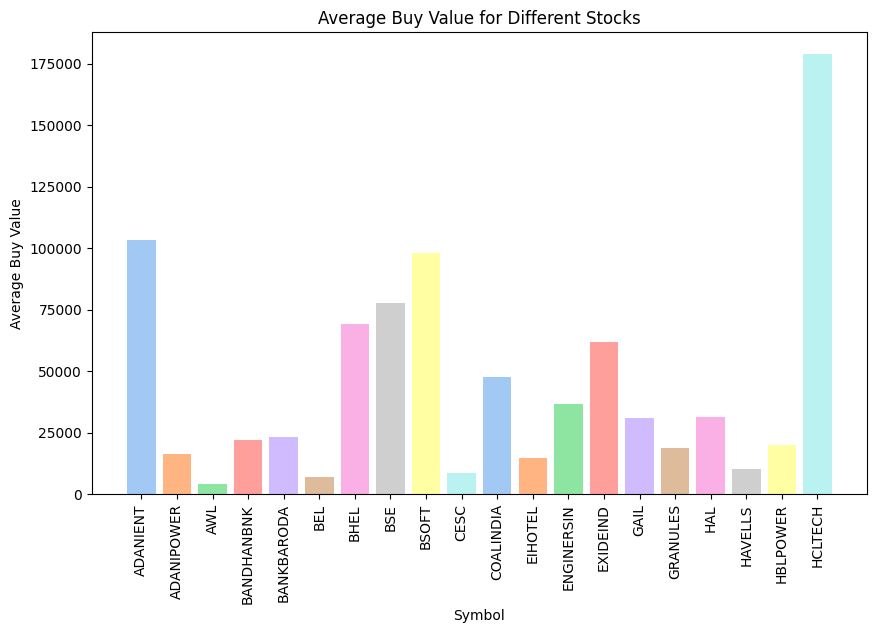

In [97]:
# visualize
plt.figure(figsize=(10,6))
plt.bar(average_buy_value.index, average_buy_value.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Average Buy Value')
plt.title('Average Buy Value for Different Stocks')
plt.xticks(rotation=90)
plt.show()

In [98]:
# average sell value for top 20 stocks
average_sell_value = stock_df.groupby('Symbol')['Sell Value'].mean()[:20]
average_sell_value

,Sell Value
Symbol,
ADANIENT,110063.00
ADANIPOWER,15300.00
AWL,4530.00
BANDHANBNK,20972.50
BANKBARODA,22651.00
BEL,7552.50
BHEL,68888.25
BSE,75275.80
BSOFT,98372.75


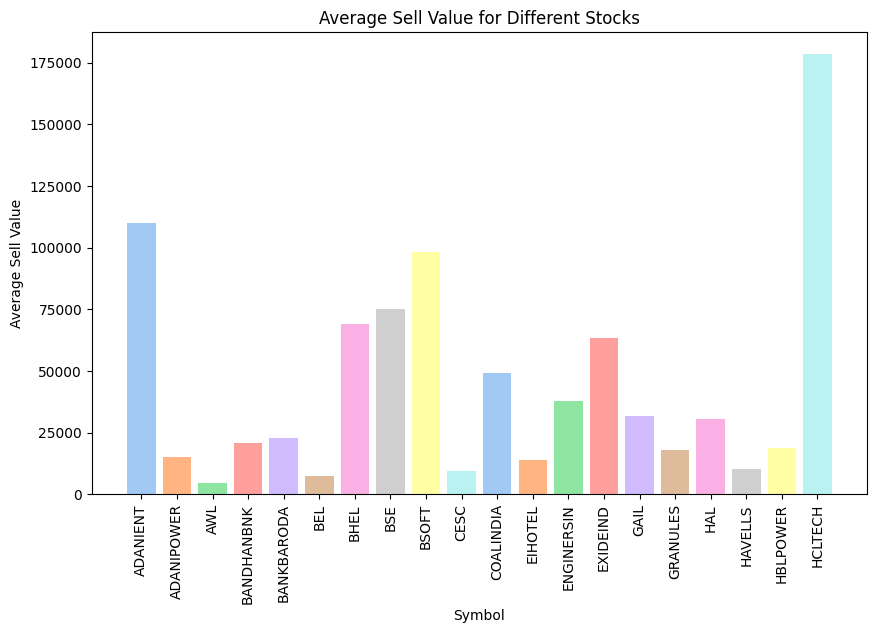

In [99]:
# visualize
plt.figure(figsize=(10,6))
plt.bar(average_sell_value.index, average_sell_value.values, color=colors)
plt.xlabel('Symbol')
plt.ylabel('Average Sell Value')
plt.title('Average Sell Value for Different Stocks')
plt.xticks(rotation=90)
plt.show()


Performance of stock based on previous closing price

In [101]:
stock_df.columns

Index(['Symbol', 'ISIN', 'Quantity', 'Buy Value', 'Sell Value', 'Realized P&L',
       'Realized P&L Pct.', 'Previous Closing Price', 'Open Quantity',
       'Open Quantity Type', 'Open Value', 'Unrealized P&L',
       'Unrealized P&L Pct.', 'Total_P&L', 'P&L_Difference', 'P&L_Ratio'],
      dtype='object')

In [103]:
# Performance of stock based on previous closing price
performance_of_stock = stock_df.groupby('Symbol')['Previous Closing Price'].mean()[:20]
performance_of_stock

,Previous Closing Price
Symbol,
ADANIENT,0.0
ADANIPOWER,0.0
AWL,0.0
BANDHANBNK,0.0
BANKBARODA,0.0
BEL,0.0
BHEL,0.0
BSE,0.0
BSOFT,0.0


Which stocks have had the largest price fluctuations based on Buy Value and Sell Value?

In [106]:
# fluctuation in price
fluctuation_in_price = stock_df.groupby('Symbol')['Buy Value'].sum()[:1]
fluctuation_in_price

,Buy Value
Symbol,
ADANIENT,103503.55


In [108]:
fluctuation_in_price_sell = stock_df.groupby('Symbol')['Sell Value'].sum()[:1]
fluctuation_in_price_sell

,Sell Value
Symbol,
ADANIENT,110063.0
